<a href="https://colab.research.google.com/github/aasrod/Covid_Data_Visualization/blob/main/Covid_19_Data_Visualization_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA & Data Visualization

In [ ]:
#Data science ex.2
#11th November 2021

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
import plotly.express as px

In [ ]:
#drive.mount('/content/drive')
#population = pd.read_csv("/content/drive/My Drive/WPP2019_TotalPopulationBySex.csv") 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
print("shape of data:", data.shape)
data.head(5)

shape of data: (134235, 67)


iso_code continent  ... excess_mortality excess_mortality_cumulative_per_million
0      AFG      Asia  ...              NaN                                     NaN
1      AFG      Asia  ...              NaN                                     NaN
2      AFG      Asia  ...              NaN                                     NaN
3      AFG      Asia  ...              NaN                                     NaN
4      AFG      Asia  ...              NaN                                     NaN

[5 rows x 67 columns]

In [ ]:
data_size = data.shape[0]

In [ ]:
#dropping iso_code column
#data.drop('iso_code', axis=1, inplace=True)

In [ ]:
#check if we have duplicate rows
data.duplicated().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    134235 non-null  object 
 1   continent                                   125670 non-null  object 
 2   location                                    134235 non-null  object 
 3   date                                        134235 non-null  object 
 4   total_cases                                 126859 non-null  float64
 5   new_cases                                   126857 non-null  float64
 6   new_cases_smoothed                          125814 non-null  float64
 7   total_deaths                                115686 non-null  float64
 8   new_deaths                                  115882 non-null  float64
 9   new_deaths_smoothed                         125814 non-null  float64
 

In [ ]:
data.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
def try_parsing_date(text):
  return datetime.strptime(text, '%Y-%m-%d').date()

y=[]
m=[]
d=[]
for i in data.date:
  y.append(try_parsing_date(i).year)
  m.append(try_parsing_date(i).month)
  d.append(try_parsing_date(i).day)

data['year'] = y
data['month'] = m
data['day'] = d

data.head(1)

iso_code continent     location  ...  year  month  day
0      AFG      Asia  Afghanistan  ...  2020      2   24

[1 rows x 70 columns]

In [ ]:
#data.drop('date', axis=1, inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
data.isnull().sum()

iso_code                                           0
continent                                       8565
location                                           0
date                                               0
total_cases                                     7376
new_cases                                       7378
new_cases_smoothed                              8421
total_deaths                                   18549
new_deaths                                     18353
new_deaths_smoothed                             8421
total_cases_per_million                         8027
new_cases_per_million                           8029
new_cases_smoothed_per_million                  9067
total_deaths_per_million                       19187
new_deaths_per_million                         18991
new_deaths_smoothed_per_million                 9067
reproduction_rate                              29254
icu_patients                                  118099
icu_patients_per_million                      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



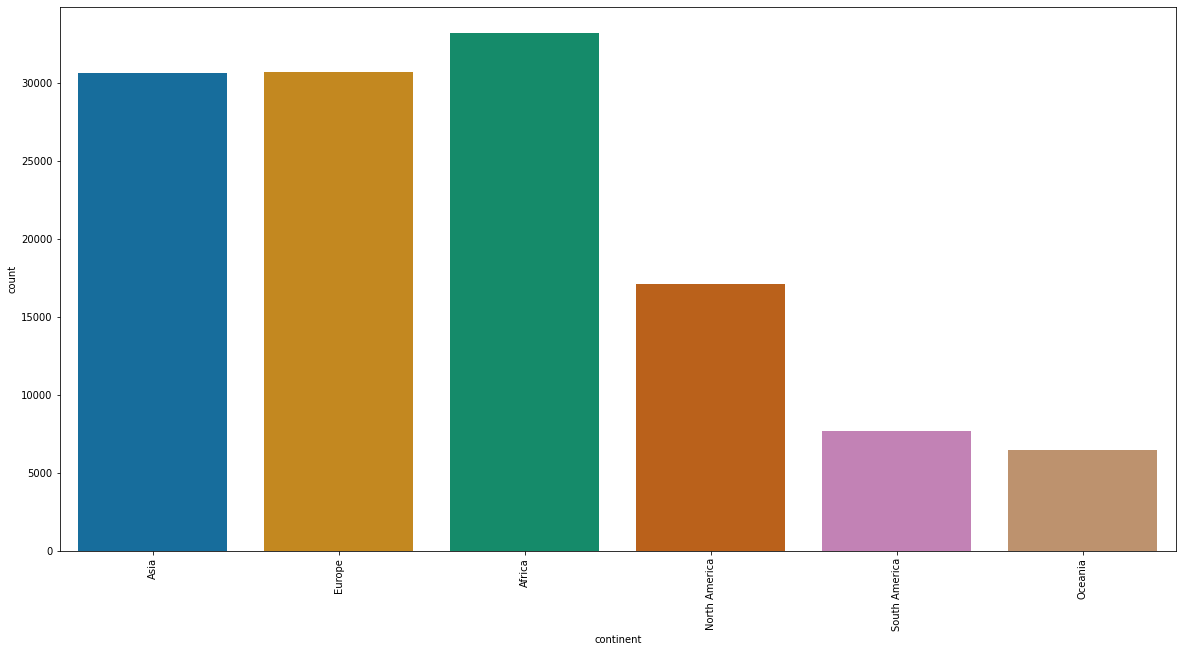

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.countplot(data.continent, palette="colorblind")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



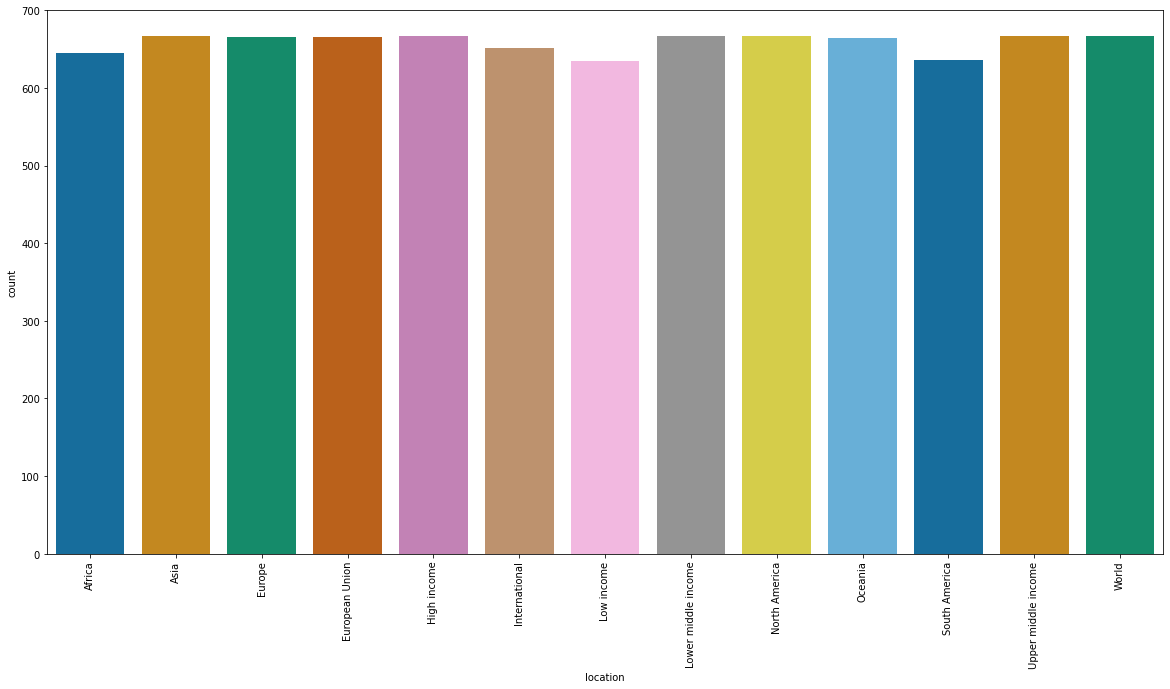

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.countplot(data[data.continent.isnull()].location, palette="colorblind")

In [ ]:
data.loc[data.location == 'Africa', 'continent'] ='Africa'
data.loc[data.location == 'Asia', 'continent'] ='Asia'
data.loc[data.location == 'Europe', 'continent'] ='Europe'
data.loc[data.location == 'European Union', 'continent'] ='Europe'
data.loc[data.location == 'North America', 'continent'] ='North America'
data.loc[data.location == 'South America', 'continent'] ='South America'
data.loc[data.location == 'Oceania', 'continent'] ='Oceania'

data.continent.fillna('Unknown', inplace=True)

data.continent.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



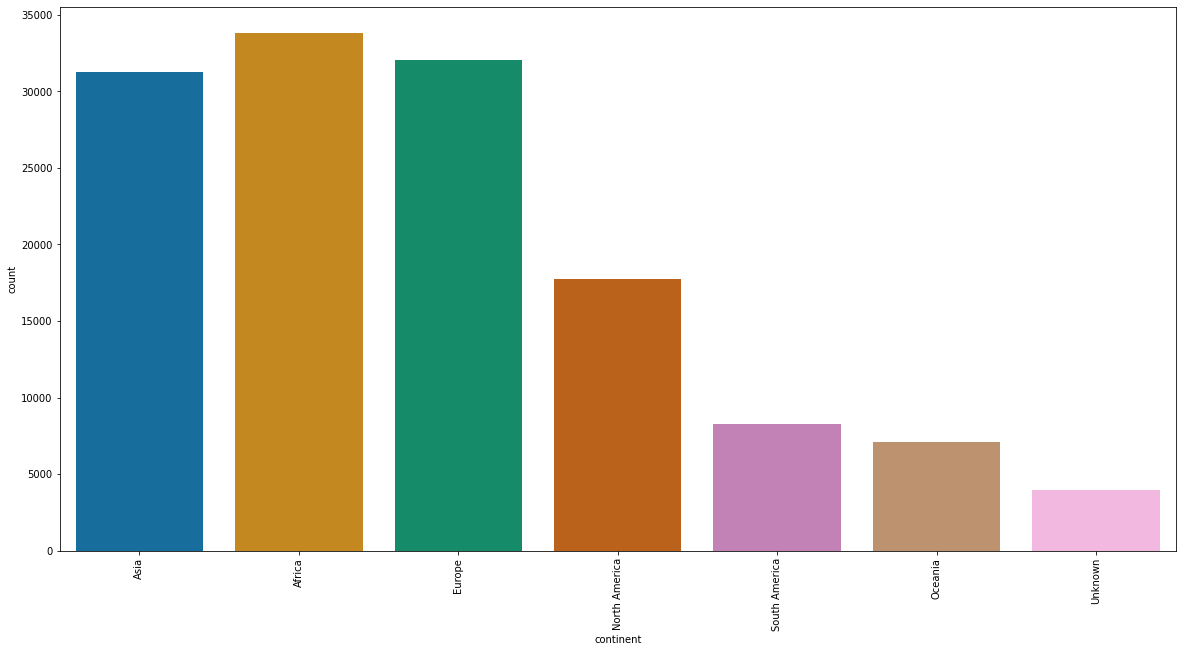

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.countplot(data.continent, palette="colorblind")

In [ ]:
#filling null values in extreme_poverty with mean value of each country

for l in data.location.unique():
  m = data[data.location == l].extreme_poverty.mean()
  data[data.location == l].extreme_poverty.fillna(m, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
s = []
for l in data.location.unique():
  s.append(data[data.location == l].population.isnull().sum())
set(s)

{0, 303, 651}

In [ ]:
set(data[data.population.isnull()].location)

{'International', 'Northern Cyprus'}

No population was found for Northern Cyprus in UN data!

In [ ]:
data.loc[(data.location=='Northern Cyprus') & (data.year==2020), 'population'] = 1207359
data.loc[(data.location=='Northern Cyprus') & (data.year==2021), 'population'] = 1218827

data[data.location=='Northern Cyprus'].population.isnull().sum()

0

In [ ]:
nov20 = data[data.date == '2020-11-01']
nov20.drop(nov20[nov20.continent == 'Unknown'].index, inplace=True, axis=0)

nov21 = data[data.date == '2021-11-01']
nov21.drop(nov21[nov21.continent == 'Unknown'].index, inplace=True, axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
d = {'location'                : nov20[nov20.total_cases_per_million.notnull()].location,
     'iso_code'                : nov20[nov20.total_cases_per_million.notnull()].iso_code,
     'continent'               : nov20[nov20.total_cases_per_million.notnull()].continent,
     'total_cases_per_million' : nov20[nov20.total_cases_per_million.notnull()].total_cases_per_million}

totalcase2020 = pd.DataFrame(d)

In [ ]:
d = {'location'                 : nov20[nov20.total_deaths_per_million.notnull()].location,
     'iso_code'                 : nov20[nov20.total_deaths_per_million.notnull()].iso_code,
     'continent'                : nov20[nov20.total_deaths_per_million.notnull()].continent,
     'total_deaths_per_million' : nov20[nov20.total_deaths_per_million.notnull()].total_deaths_per_million}

totaldeaths2020 = pd.DataFrame(d)

In [ ]:
d = {'location'                : nov21[nov21.total_cases_per_million.notnull()].location,
     'iso_code'                : nov21[nov21.total_cases_per_million.notnull()].iso_code,
     'continent'               : nov21[nov21.total_cases_per_million.notnull()].continent,
     'total_cases_per_million' : nov21[nov21.total_cases_per_million.notnull()].total_cases_per_million}

totalcase2021 = pd.DataFrame(d)

In [ ]:
d = {'location'                 : nov21[nov21.total_deaths_per_million.notnull()].location,
     'iso_code'                 : nov21[nov21.total_deaths_per_million.notnull()].iso_code,
     'continent'                : nov21[nov21.total_deaths_per_million.notnull()].continent,
     'total_deaths_per_million' : nov21[nov21.total_deaths_per_million.notnull()].total_deaths_per_million}

totaldeaths2021 = pd.DataFrame(d)

In [ ]:
fig = px.scatter_geo(totalcase2020, locations="iso_code", color="continent",
                     hover_name="location",
                     size="total_cases_per_million",
                     projection="natural earth",
                     title="Total cases per million in 1st November 2020")
fig.show()

In [ ]:
fig = px.scatter_geo(totaldeaths2020, locations="iso_code", color="continent",
                     hover_name="location",
                     size="total_deaths_per_million",
                     projection="natural earth",
                     title="Total deaths per million in 1st November 2020")
fig.show()

In [ ]:
fig = px.scatter_geo(totalcase2021, locations="iso_code", color="continent",
                     hover_name="location",
                     size="total_cases_per_million",
                     projection="natural earth",
                     title="Total cases per million in 1st November 2021")
fig.show()

In [ ]:
fig = px.scatter_geo(totaldeaths2021, locations="iso_code", color="continent",
                     hover_name="location",
                     size="total_deaths_per_million",
                     projection="natural earth",
                     title="Total deaths per million in 1st November 2021")
fig.show()

In [ ]:
data2020 = data[data.year == 2020]
data2020.drop(data2020[data2020.continent == 'Unknown'].index, inplace=True, axis=0)

data2021 = data[data.year == 2021]
data2021.drop(data2021[data2021.continent == 'Unknown'].index, inplace=True, axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
d = {'location'                : data2020[data2020.total_cases_per_million.notnull()].location,
     'iso_code'                : data2020[data2020.total_cases_per_million.notnull()].iso_code,
     'continent'               : data2020[data2020.total_cases_per_million.notnull()].continent,
     'total_cases_per_million' : data2020[data2020.total_cases_per_million.notnull()].total_cases_per_million,
     'month'                   : data2020[data2020.total_cases_per_million.notnull()].month}

totalcase2020_anim = pd.DataFrame(d)

In [ ]:
d = {'location'                : data2021[data2021.total_cases_per_million.notnull()].location,
     'iso_code'                : data2021[data2021.total_cases_per_million.notnull()].iso_code,
     'continent'               : data2021[data2021.total_cases_per_million.notnull()].continent,
     'total_cases_per_million' : data2021[data2021.total_cases_per_million.notnull()].total_cases_per_million,
     'month'                   : data2021[data2021.total_cases_per_million.notnull()].month}

totalcase2021_anim = pd.DataFrame(d)

51807

In [ ]:
fig = px.scatter_geo(totalcase2020_anim, locations="iso_code", color="continent",
                     hover_name="location", size="total_cases_per_million",
                     animation_frame="month",
                     projection="natural earth",
                     title="Changes in the number of total cases per million in 2020")
fig.show()

In [ ]:
fig = px.scatter_geo(totalcase2021_anim, locations="iso_code", color="continent",
                     hover_name="location", size="total_cases_per_million",
                     animation_frame="month",
                     projection="natural earth",
                     title="Changes in the number of total cases per million in 2021")
fig.show()


In [ ]:
oct2020 = data[data.year == 2020]
oct2020 = oct2020[oct2020.month == 10]


ger_oct2020 = oct2020[oct2020.location == 'Germany']
eng_oct2020 = oct2020[oct2020.location == 'United Kingdom']
fra_oct2020 = oct2020[oct2020.location == 'France']
rus_oct2020 = oct2020[oct2020.location == 'Russia']

In [ ]:
len(ger_oct2020.new_cases_smoothed_per_million)

31

In [ ]:
plotcases = pd.DataFrame({
    "Germany" : list(ger_oct2020.new_cases_smoothed_per_million),
    "United Kingdom" : list(eng_oct2020.new_cases_smoothed_per_million),
    "France" : list(fra_oct2020.new_cases_smoothed_per_million),
    "Russia" : list(rus_oct2020.new_cases_smoothed_per_million),
    },
    index=[i+1 for i in range(31)])

Text(0, 0.5, 'New cases smoothed per million')

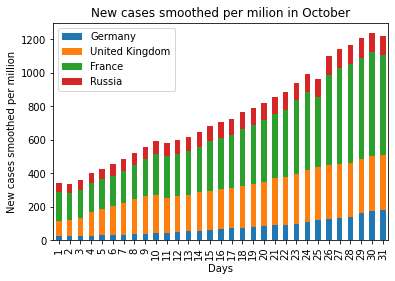

In [ ]:
plotcases.plot(kind='bar', stacked=True)

plt.title("New cases smoothed per milion in October")
plt.xlabel("Days")
plt.ylabel("New cases smoothed per million")

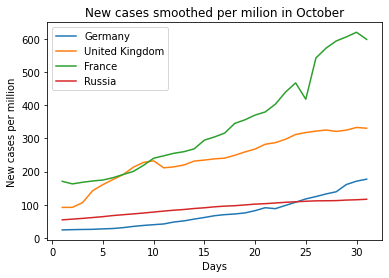

In [ ]:
plt.plot(ger_oct2020.day, ger_oct2020.new_cases_smoothed_per_million, label='Germany')
plt.plot(eng_oct2020.day, eng_oct2020.new_cases_smoothed_per_million, label='United Kingdom')
plt.plot(fra_oct2020.day, fra_oct2020.new_cases_smoothed_per_million, label='France')
plt.plot(rus_oct2020.day, rus_oct2020.new_cases_smoothed_per_million, label='Russia')

plt.title("New cases smoothed per milion in October")
plt.xlabel("Days")
plt.ylabel("New cases per million")
plt.legend()

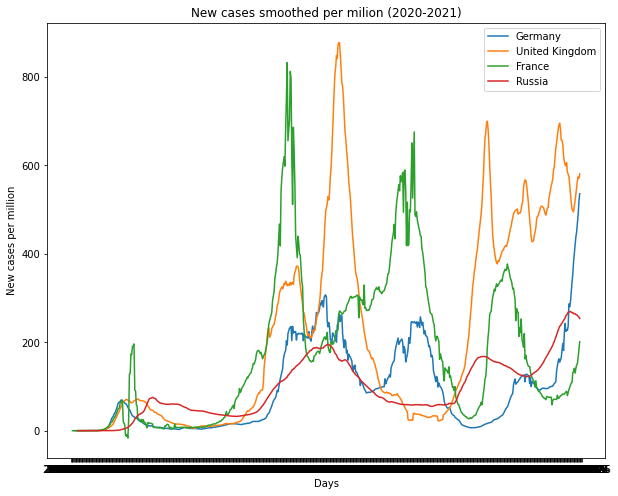

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(data[data.location=='Germany'].date, data[data.location=='Germany'].new_cases_smoothed_per_million, label='Germany')
plt.plot(data[data.location=='United Kingdom'].date, data[data.location=='United Kingdom'].new_cases_smoothed_per_million, label='United Kingdom')
plt.plot(data[data.location=='France'].date, data[data.location=='France'].new_cases_smoothed_per_million, label='France')
plt.plot(data[data.location=='Russia'].date, data[data.location=='Russia'].new_cases_smoothed_per_million, label='Russia')

plt.title("New cases smoothed per milion (2020-2021)")
plt.xlabel("Days")
plt.ylabel("New cases per million")
plt.legend()

In [ ]:
eu_data = data[data.continent == 'Europe']
eu_data = eu_data[eu_data.location!='Europe']
eu_data = eu_data[eu_data.aged_65_older.notnull()]


sample_eu = np.random.choice(eu_data.location.unique(), 10, replace=False)
sample_eu

array(['Slovenia', 'Latvia', 'Slovakia', 'Ireland', 'Serbia',
       'United Kingdom', 'Ukraine', 'Germany', 'Netherlands', 'Hungary'],
      dtype=object)

In [ ]:
whole2020 = data[data.year==2020]
lastday2020 = data[data.date=='2020-12-30']
lastday2020 = lastday2020[lastday2020.continent=='Europe']

In [ ]:
europe_sample = {'location': lastday2020[lastday2020.location.isin(sample_eu)].location,
                 'aged_65_older' : lastday2020[lastday2020.location.isin(sample_eu)].aged_65_older*10000,
                 'total_cases_per_million' : lastday2020[lastday2020.location.isin(sample_eu)].total_cases_per_million,
                 'diabetes_prevalence' : lastday2020[lastday2020.location.isin(sample_eu)].diabetes_prevalence*10000,
                 }

europe_sample = pd.DataFrame(europe_sample)

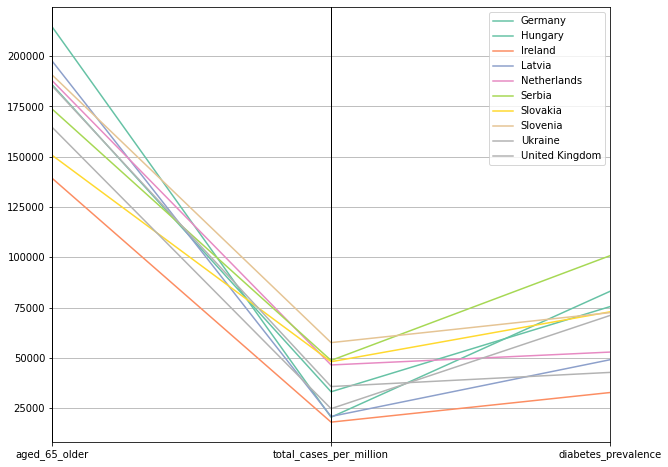

In [ ]:
plt.figure(figsize=(10,8))
pd.plotting.parallel_coordinates(europe_sample, 'location', colormap=plt.get_cmap("Set2"))
plt.show()

In [ ]:
eu_data2 = whole2020[whole2020.continent == 'Europe']
eu_data2 = eu_data2[eu_data2.location!='Europe']
eu_data2 = eu_data2[eu_data2.positive_rate.notnull()]

sample_eu2 = np.random.choice(eu_data.location.unique(), 20, replace=False)
sample_eu2

array(['Iceland', 'Hungary', 'Ukraine', 'Sweden', 'Serbia', 'Norway',
       'Denmark', 'Spain', 'Bulgaria', 'United Kingdom', 'Switzerland',
       'Finland', 'Ireland', 'Russia', 'Netherlands', 'Latvia', 'Cyprus',
       'Belarus', 'Luxembourg', 'Estonia'], dtype=object)

In [ ]:
m=[]
p=[]
for l in sample_eu2:
  m.append((l, whole2020[whole2020.location==l].positive_rate.mean()))
  p.append(whole2020[whole2020.location==l].population_density.unique()[0])

scatter_data_eu = pd.DataFrame(m , columns=['location', 'positive_rate_mean'])
scatter_data_eu['population_density'] = p

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



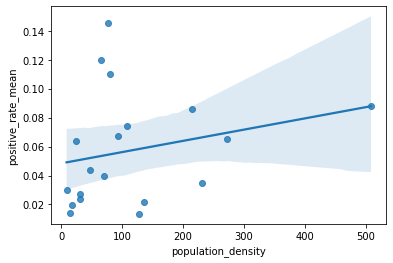

In [ ]:
sns.regplot(scatter_data_eu.population_density, scatter_data_eu.positive_rate_mean)